# The basics

- Classes provide a means of __bundling data and functionality__ together.
- Creating a new class creates __a new type of object, allowing new instances of that type__ to be made.
- Each class instance can have __attributes__ attached to it for __maintaining its state.__
- Class instances can also have __methods__ (defined by its class) for __modifying its state.__

- Objects have __individuality__, and __multiple names__ (in multiple scopes) can be bound to the __same object.__

## Class Definition Syntax

- The simplest form of class definition looks like this:

```python
class ClassName:
    <statement-1>
    .
    .
    .
    <statement-N>
```

- __Class definitions__, like function definitions (def statements) __must be executed before they have any effect__. (You could conceivably place a class definition in a branch of an if statement, or inside a function.)

## Class Objects

In [1]:
class MyClass:
    """A simple example class"""
    i = 12345

    def f(self):
        return 'hello world'

- Class instantiation uses function notation. Just pretend that the class object is a parameterless function that returns a new instance of the class.

In [2]:
x = MyClass()  # creates a new instance of the class and assigns this object to the local variable x.

- Many classes like to create objects with instances customized to a specific initial state. Therefore a class may define a special method named \_\_init\_\_(), like this:

```python
def __init__(self):
    self.data = []
```

- When a class defines an \_\_init\_\_() method, class instantiation __automatically invokes \_\_init\_\_() for the newly-created class instance.__

In [4]:
class Complex:
    def __init__(self, realpart, imagpart):
        self.r = realpart
        self.i = imagpart

In [5]:
x = Complex(3.0, -4.5)

In [8]:
print(f"x.r : {x.r}")
print(f"x.i : {x.i}")

x.r : 3.0
x.i : -4.5


- __Data attributes need not be declared.__
- They spring into existence when they are first assigned to.

In [9]:
x.ok = 12

In [10]:
print(x.ok)

12


In [12]:
y = Complex(2, -2)

In [13]:
y.ok

AttributeError: 'Complex' object has no attribute 'ok'

## Class and Instance Variables

- __Instance variables__ are for data __unique to each instance__. 
- __Class variables__ are for attributes and methods __shared by all instances__ of the class.

In [14]:
class Dog:

    kind = 'lab'         # class variable shared by all instances

    def __init__(self, name):
        self.name = name    # instance variable unique to each instance

In [15]:
d = Dog('Fido')
e = Dog('Buddy')
print(f"d.kind: {d.kind}")                  # shared by all dogs
print(f"e.kind: {e.kind}")                  # shared by all dogs
print(f"d.name: {d.name}")                  # unique to d
print(f"e.name: {e.name}")                  # unique to e

d.kind: lab
e.kind: lab
d.name: Fido
e.name: Buddy


- __If the same attribute name occurs in both an instance and in a class, then attribute lookup prioritizes the instance:__

In [30]:
class MyClass:
    a = "abc"
    b = "def"


In [31]:
obj = MyClass()

In [32]:
obj.a

'abc'

In [33]:
obj.b

'def'

In [34]:
obj1 = MyClass()

In [35]:
obj1.a = "asdf"

In [36]:
obj.a

'abc'

In [37]:
obj1.a

'asdf'

In [38]:
mc = MyClass()
mc.a

'abc'

__Any function object that is a class attribute defines a method for instances of that class. It is not necessary that the function definition is textually enclosed in the class definition: assigning a function object to a local variable in the class is also ok.__

In [39]:
# Function defined outside the class
def f1(self, x, y):
    return min(x, x+y)

class C:
    f = f1

    def g(self):
        return 'hello world'

    h = g

__Methods may call other methods by using method attributes of the self argument:__

In [40]:
class Bag:
    def __init__(self):
        self.data = []

    def add(self, x):
        self.data.append(x)

    def addtwice(self, x):
        self.add(x)
        self.add(x)

## Inheritance

```python
class DerivedClassName(BaseClassName):
    <statement-1>
    .
    .
    .
    <statement-N>
```

- And this is also correct:

```python
import modname

class DerivedClassName(modname.BaseClassName):
    <statement-1>
    .
    .
    .
    <statement-N>
```

- If a requested attribute is not found in the class, the search proceeds to look in the base class.
- This rule is applied recursively if the base class itself is derived from some other class.

- __Derived classes may override methods of their base classes.__

In [41]:
class A:
    def method_a(self):
        print(f"memory addr of obj in A: {id(self)}")
        print("method_a from A")
        
    def method_b(self):
        self.method_a()
        
class B(A):
    def method_a(self):
        print(f"memory addr of obj in B: {id(self)}")
        print("method_a from B")
#         A.method_a(self)
        super().method_a()

In [46]:
b = B()
b.method_b()

memory addr of obj in B: 140706085495184
method_a from B
memory addr of obj in A: 140706085495184
method_a from A


- Use isinstance() to check an instance’s type: isinstance(obj, int) will be True only if obj.\_\_class\_\_ is int or some class derived from int.

- Use issubclass() to check class inheritance: issubclass(bool, int) is True since bool is a subclass of int. However, issubclass(float, int) is False since float is not a subclass of int.

### Multiple Inheritance

```python
class DerivedClassName(Base1, Base2, Base3):
    <statement-1>
    .
    .
    .
    <statement-N>
```

- If an attribute is not found in DerivedClassName, it is searched for in Base1, then (recursively) in the base classes of Base1, and if it was not found there, it was searched for in Base2, and so on.

- Dynamic ordering is necessary because all cases of multiple inheritance exhibit one or more diamond relationships (where at least one of the parent classes can be accessed through multiple paths from the bottommost class).

## Private Variables

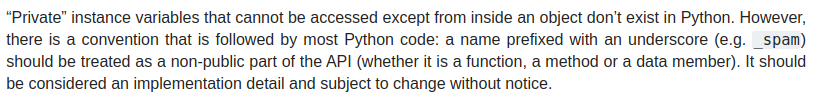

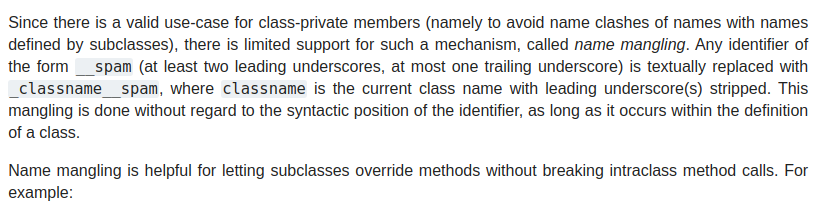

In [60]:
class Mapping:
    def __init__(self, iterable):
        self.items_list = []
        self.__update(iterable)

    def update(self, iterable):
        for item in iterable:
            self.items_list.append(item)

    __update = update   # private copy of original update() method

class MappingSubclass(Mapping):

    def update(self, keys, values):
        # provides new signature for update()
        # but does not break __init__()
        for item in zip(keys, values):
            self.items_list.append(item)

- __Note that the mangling rules are designed mostly to avoid accidents; it still is possible to access or modify a variable that is considered private. This can even be useful in special circumstances, such as in the debugger.__

# Getting our hands on writing classes

In [14]:
# an empty employee class

class RichKids:
    pass

In [15]:
kid_1 = RichKids()
kid_2 = RichKids()

In [16]:
print(f"id(kid_1): {id(kid_1)}")
print(f"id(kid_2): {id(kid_2)}")

id(kid_1): 140662117974800
id(kid_2): 140662117976144


In [17]:
# Instance variables need not be predefined in the class definition
kid_1.name = "Bruce Wayne"
kid_1.email = "Dark.Knight@gotham.city"
kid_1.universe = "DC"

kid_2.name = "Tony Stark"
kid_2.email = "Who.Cares@iamiron.man"
kid_2.universe = "Marvel"

In [18]:
print(f"kid_1.name: {kid_1.name}")
print(f"kid_1.email: {kid_1.email}")
print(f"kid_1.universe: {kid_1.universe}")

print("\n\n================================\n\n")

print(f"kid_2.name: {kid_2.name}")
print(f"kid_2.email: {kid_2.email}")
print(f"kid_2.universe: {kid_2.universe}")

kid_1.name: Bruce Wayne
kid_1.email: Dark.Knight@gotham.city
kid_1.universe: DC




kid_2.name: Tony Stark
kid_2.email: Who.Cares@iamiron.man
kid_2.universe: Marvel


__But this is the WORST way to do this.__

In [49]:
class TheGods:
    
    def __init__(self, name, email, universe):
        self.name = name
        self.email = email
        self.universe = universe
        
    def brag_about_self(self):
        return f"I am {self.name} from {self.universe} universe and I will save humans from aliens that I brought to earth in the first place"

In [50]:
god_1 = TheGods("Princess Diana of Themyscira", "Bornby.Zeus@never.dies", "DC")

god_2 = TheGods("Son of odin and God of thunder The Thor", "Lost.Brother@got.fat", "Marvel")

In [51]:
print(f"god_1.name: {god_1.name}")
print(f"god_1.email: {god_1.email}")
print(f"god_1.universe: {god_1.universe}")

print("\n\n================================\n\n")

print(f"god_2.name: {god_2.name}")
print(f"god_2.email: {god_2.email}")
print(f"god_2.universe: {god_2.universe}")

god_1.name: Princess Diana of Themyscira
god_1.email: Bornby.Zeus@never.dies
god_1.universe: DC




god_2.name: Son of odin and God of thunder The Thor
god_2.email: Lost.Brother@got.fat
god_2.universe: Marvel


In [52]:
god_1.brag_about_self()

'I am Princess Diana of Themyscira from DC universe and I will save humans from aliens that I brought to earth in the first place'

In [53]:
god_2.brag_about_self()

'I am Son of odin and God of thunder The Thor from Marvel universe and I will save humans from aliens that I brought to earth in the first place'

- Notice that when you do ```object.method()``` the object or instance that calls the method is passed implicitly as first positional argument in ```method()```.

__SO__

```python
def brag_about_self(self)
```

- Takes one position argument which is ```self```.
- However, you can use any name instead of ```self```.

```python
def brag_about_self(asdf)
```

- This will also be fine just that now you can refer to the calling object with ```asdf```.


__THAT IMPLIES__

```python
TheGods.brag_about_self(god_1)
```

- AND

```python
god_1.brag_about_self()
```

__Are essentially the same.__

- This what is going on in the background when we do ```instance.method()```.
- It transforms into ```Class.method(instance)```.

# Class variables

In [54]:
class YoungTalent:
    
    abilities = ['Kick out bad guys']
    power = 100
    
    def __init__(self, name, email, god_father):
        self.name = name
        self.email = email
        self.god_father = god_father
        
    def add_ability(self, ability):
        self.abilities.append(ability)
#         self.abilities = [ability]

    def change_power(self, power):
        self.power = power

In [55]:
spidy = YoungTalent("Peter Parker", "Lost.uncle@web.com", "Mr. Stark")

flash = YoungTalent("Barry Alen", "fastest.man.alive@zoom.com", "Dr. Harrison Wells")

In [56]:
print(f"spidy can: {spidy.abilities}")
print(f'spidy\'s power: {spidy.power}')

spidy can: ['Kick out bad guys']
spidy's power: 100


In [57]:
print(f"Flash can: {flash.abilities}")
print(f"Flash's power: {flash.power}")

Flash can: ['Kick out bad guys']
Flash's power: 100


In [58]:
spidy.add_ability("Create and throw webs")
spidy.change_power(5000)

In [59]:
flash.add_ability("Run really fast")
flash.change_power(6000)

In [60]:
print(f"spidy can: {spidy.abilities}")
print(f'spidy\'s power: {spidy.power}')

spidy can: ['Kick out bad guys', 'Create and throw webs', 'Run really fast']
spidy's power: 5000


In [61]:
print(f"Flash can: {flash.abilities}")
print(f"Flash's power: {flash.power}")

Flash can: ['Kick out bad guys', 'Create and throw webs', 'Run really fast']
Flash's power: 6000


**REALLY IMP**

__When you _MUTATE_ a class variable it will change for all the instances of that class but when you _ASSIGN_ it using ```self.attribute = value``` it will change only for that object__

__If you want to change an immutable value for all the instances of a class then use ```ClassName.attribute = value``` or do ```cls.attribute = value```__


```python
@classmethod
def change_power(cls, power):
        cls.power = power
        

YoungTalent.change_power(200)


YoungTalent.power = 200

```

__NOTE: Above method will not affect any object that has already changed it's value using ```self```.__


__This magic is done with the help of NAMESPACES of object and it's class.__

__SEE instance.\_\_dict\_\_ before and after changing the values.__

## Real life example of class varaibles

In [63]:
class Employee:
    
    num_of_emps = 0          # Always same for all the instances of class
    raise_amount = 1.04      # May differ from employee to employee
    
    def __init__(self, first_name, last_name, salary):
        self.first_name = first_name
        self.last_name = last_name
        self.salary = salary
        self.email = first_name + '.' + last_name + "@inexture.com"
        
        Employee.num_of_emps +=  1
        
        
    def full_name(self):
        return f"{self.first_name} {self.last_name}"
    
    def apply_raise(self):
        print(f"Raising the salary with amount: {self.raise_amount}")
        self.salary = int(self.salary*self.raise_amount)

In [64]:
emp_1 = Employee("Tom", "Cat", 50000)
emp_2 = Employee("Jerry", "Mouse", 60000)

In [65]:
emp_1.__dict__

{'first_name': 'Tom',
 'last_name': 'Cat',
 'salary': 50000,
 'email': 'Tom.Cat@inexture.com'}

In [66]:
emp_2.__dict__

{'first_name': 'Jerry',
 'last_name': 'Mouse',
 'salary': 60000,
 'email': 'Jerry.Mouse@inexture.com'}

In [67]:
print(emp_1.raise_amount)
print(emp_2.raise_amount)
print(Employee.raise_amount)

1.04
1.04
1.04


In [68]:
emp_1.raise_amount = 1.05

In [69]:
emp_1.__dict__

{'first_name': 'Tom',
 'last_name': 'Cat',
 'salary': 50000,
 'email': 'Tom.Cat@inexture.com',
 'raise_amount': 1.05}

In [70]:
emp_2.__dict__

{'first_name': 'Jerry',
 'last_name': 'Mouse',
 'salary': 60000,
 'email': 'Jerry.Mouse@inexture.com'}

In [71]:
print(emp_1.raise_amount)
print(emp_2.raise_amount)
print(Employee.raise_amount)

1.05
1.04
1.04


In [155]:
Employee.__dict__

mappingproxy({'__module__': '__main__',
              'num_of_emps': 2,
              'raise_amount': 1.04,
              '__init__': <function __main__.Employee.__init__(self, first_name, last_name, salary)>,
              'full_name': <function __main__.Employee.full_name(self)>,
              'apply_raise': <function __main__.Employee.apply_raise(self)>,
              '__dict__': <attribute '__dict__' of 'Employee' objects>,
              '__weakref__': <attribute '__weakref__' of 'Employee' objects>,
              '__doc__': None})

In [156]:
emp_1.apply_raise()
emp_2.apply_raise()

Raising the salary with amount: 1.05
Raising the salary with amount: 1.04


# Class methods

In [176]:
class Employee:
    
    num_of_emps = 0          # Always same for all the instances of class
    raise_amount = 1.04      # May differ from employee to employee
    
    def __init__(self, first_name, last_name, salary):
        self.first_name = first_name
        self.last_name = last_name
        self.salary = salary
        self.email = f'{first_name}.{last_name}@inexture.com'

        Employee.num_of_emps +=  1
        
        
    def full_name(self):
        return f"{self.first_name} {self.last_name}"
    
    def apply_raise(self):
        print(f"Raising the salary with amount: {self.raise_amount}")
        self.salary = int(self.salary*self.raise_amount)
        
    @classmethod
    def set_raise_amount(cls, amount):
        cls.raise_amount = amount
    
    @classmethod
    def from_string(cls, string):
        first_name, last_name, salary = string.split('-')
        return cls(first_name, last_name, int(salary))

In [177]:
emp_1 = Employee("John", "silvesa", "10000000")
emp_2 = Employee("Corey", "Schafer", "2000000")

In [178]:
print(f"emp_1.raise_amount = {emp_1.raise_amount}")
print(f"emp_2.raise_amount = {emp_2.raise_amount}")

emp_1.raise_amount = 1.04
emp_2.raise_amount = 1.04


In [179]:
Employee.set_raise_amount(1.05)

In [180]:
print(f"emp_1.raise_amount = {emp_1.raise_amount}")
print(f"emp_2.raise_amount = {emp_2.raise_amount}")

emp_1.raise_amount = 1.05
emp_2.raise_amount = 1.05


In [181]:
emp_1.set_raise_amount(1.04)

In [182]:
print(f"emp_1.raise_amount = {emp_1.raise_amount}")
print(f"emp_2.raise_amount = {emp_2.raise_amount}")

emp_1.raise_amount = 1.04
emp_2.raise_amount = 1.04


In [183]:
emp_3 = Employee.from_string("Lion-king-10000000")

In [184]:
emp_3.full_name()

'Lion king'

In [185]:
emp_3.salary

10000000

# Static method


- You do not use any instance or class itself or any attributes in that case when you create a static method.

In [187]:
class Employee:
    
    num_of_emps = 0          # Always same for all the instances of class
    raise_amount = 1.04      # May differ from employee to employee
    
    def __init__(self, first_name, last_name, salary):
        self.first_name = first_name
        self.last_name = last_name
        self.salary = salary
        self.email = first_name + '.' + last_name + "@inexture.com"
        
        Employee.num_of_emps +=  1
        
        
    def full_name(self):
        return f"{self.first_name} {self.last_name}"
    
    def apply_raise(self):
        print(f"Raising the salary with amount: {self.raise_amount}")
        self.salary = int(self.salary*self.raise_amount)
        
    @classmethod
    def set_raise_amount(cls, amount):
        cls.raise_amount = amount
    
    @classmethod
    def from_string(cls, string):
        first_name, last_name, salary = string.split('-')
        return cls(first_name, last_name, int(salary))
    
    @staticmethod
    def is_weekend(day):
        return day.weekday() == 5 or day.weekday() == 6

In [190]:
import datetime

my_date = datetime.date(2020, 1, 12)

Employee.is_weekend(my_date)

True

# Inheritance

In [191]:
class Developer(Employee):
    
    def __init__(self, first_name, last_name, salary, prog_lang):
        super().__init__(first_name, last_name, salary)
        self.prog_lang = prog_lang

In [192]:
dev_1 = Developer("Pritesh", "Thaker", 10000000, "Python")

In [193]:
dev_1.full_name()

'Pritesh Thaker'

In [194]:
dev_1.salary

10000000

In [195]:
dev_1.prog_lang

'Python'

# Special / Dunder / Magic methods

In [197]:
print(dev_1)

In [198]:
repr(dev_1)

'<__main__.Developer object at 0x7fee900fe2d0>'

In [199]:
str(dev_1)

'<__main__.Developer object at 0x7fee900fe2d0>'

1. __repr__

    - Used for describing object and debugging and logging purposes.




2. __str__

    - Used for displaying object to end-user

In [234]:
class Employee:
    
    num_of_emps = 0          # Always same for all the instances of class
    raise_amount = 1.04      # May differ from employee to employee
    
    def __init__(self, first_name, last_name, salary):
        self.first_name = first_name
        self.last_name = last_name
        self.salary = salary
        self.email = first_name + '.' + last_name + "@inexture.com"
        
        Employee.num_of_emps +=  1
        
        
    def full_name(self):
        return f"{self.first_name} {self.last_name}"
    
    def apply_raise(self):
        print(f"Raising the salary with amount: {self.raise_amount}")
        self.salary = int(self.salary*self.raise_amount)
        
    @classmethod
    def set_raise_amount(cls, amount):
        cls.raise_amount = amount
    
    @classmethod
    def from_string(cls, string):
        first_name, last_name, salary = string.split('-')
        return cls(first_name, last_name, int(salary))
    
    @staticmethod
    def is_weekend(day):
        return day.weekday() == 5 or day.weekday() == 6
    
    def __repr__(self):
        return f"Employee('{self.first_name}', '{self.last_name}', {self.salary})"
    
    def __str__(self):
        return f"{self.full_name()} : {self.email}"
    
    def __add__(self, other):
        return self.salary + other.salary

In [235]:
emp_1 = Employee("Tom", "Cat", 50000)

In [236]:
print(emp_1)

Tom Cat : Tom.Cat@inexture.com


In [237]:
repr(emp_1)  # same as emp_1.__repr__().

"Employee('Tom', 'Cat', 50000)"

In [238]:
str(emp_1)  # same as emp_1.__str__().
            # when __str__() is not defined it uses __repr__() internally. 

'Tom Cat : Tom.Cat@inexture.com'

In [239]:
print(emp_1)  # print calls instance.__str__() internally.

Tom Cat : Tom.Cat@inexture.com


__Let's have a look at some other special methods.__

In [240]:
# What happens when we do 
print(1 + 2)

3


In [241]:
# it is actually 
print(int.__add__(1, 2))

3


In [243]:
# Let's try and add salary of 2 employee together
emp_2 = Employee("Jerry", "Mouse", 60000)

In [244]:
emp_1 + emp_2

110000

# Property Decorators - Getters, Setters, and Deleters

In [251]:
class Employee:
    
    num_of_emps = 0          # Always same for all the instances of class
    raise_amount = 1.04      # May differ from employee to employee
    
    def __init__(self, first_name, last_name, salary):
        self.first_name = first_name
        self.last_name = last_name
        self.salary = salary
#         self.email = first_name + '.' + last_name + "@inexture.com"
        
        Employee.num_of_emps +=  1
        
        
#     def full_name(self):
#         return f"{self.first_name} {self.last_name}"
    
    def apply_raise(self):
        print(f"Raising the salary with amount: {self.raise_amount}")
        self.salary = int(self.salary*self.raise_amount)
        
    @classmethod
    def set_raise_amount(cls, amount):
        cls.raise_amount = amount
    
    @classmethod
    def from_string(cls, string):
        first_name, last_name, salary = string.split('-')
        return cls(first_name, last_name, int(salary))
    
    @staticmethod
    def is_weekend(day):
        return day.weekday() == 5 or day.weekday() == 6
    
    def __repr__(self):
        return f"Employee('{self.first_name}', '{self.last_name}', {self.salary})"
    
    def __str__(self):
        return f"{self.full_name()} : {self.email}"
    
    def __add__(self, other):
        return self.salary + other.salary
    
    @property
    def email(self):
        return f"{self.first_name}.{self.last_name}@inexture.com"
    
    @property
    def full_name(self):
        return f"{self.first_name} {self.last_name}"
    
    @full_name.setter
    def full_name(self, name):
        self.first_name, self.last_name = name.split(" ")
        
    @full_name.deleter
    def full_name(self):
        print("You just deleted the name of employee!!!")
        self.first_name = None
        self.last_name = None
    

In [252]:
emp_1 = Employee("Jerry", "Mouse", 60000)

In [253]:
emp_1.email

'Jerry.Mouse@inexture.com'

In [254]:
emp_1.full_name = "Tom Cat"

In [255]:
emp_1.full_name

'Tom Cat'

In [256]:
emp_1.email

'Tom.Cat@inexture.com'

In [257]:
del emp_1.full_name

You just deleted the name of employee!!!
